In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def poly_grad(coefs, x):
    res = 0.0
    for i in range(len(coefs)):
        res += i * coefs[i] * (x**(i-1))
    return res


In [4]:
def grad_descent(poly, step_size=0.1, iterations=10, x=100.):
    x_list = [x]
    for i in range(iterations):
        x = x - (step_size * poly_grad(poly, x))
        x_list.append(x)
    return x_list


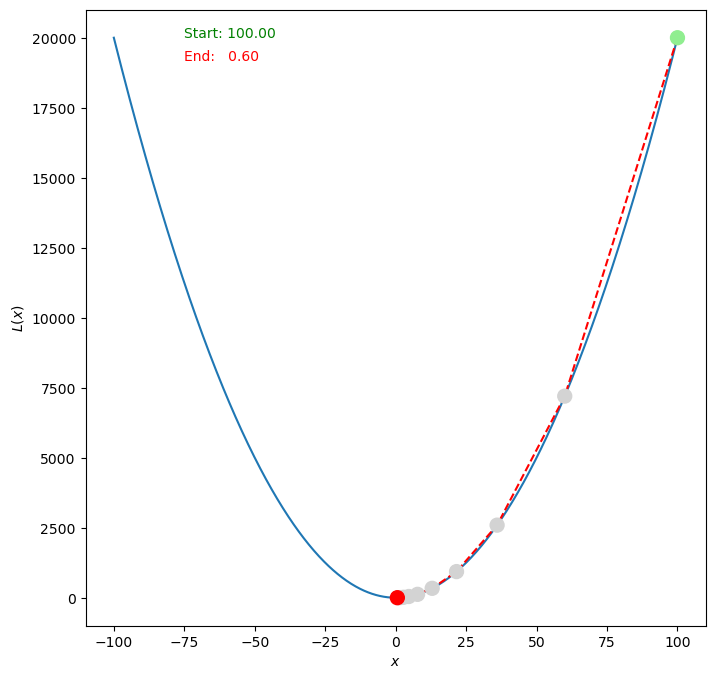

In [5]:
# runs the `grad_descent` function and will plot 
# the "trajectory" of the x-values visited
fig, ax = plt.subplots(figsize=(8, 8))

x_list = grad_descent([15, 0, 2])
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(np.linspace(-100, 100, 1001), 2*(np.linspace(-100, 100, 1001)**2) + 15)
ax.plot(x_list, [2*(x**2) + 15 for x in x_list], c='r', ls='--')
ax.scatter(x_list, [2*(x**2) + 15 for x in x_list], c=colors, s=100, zorder=1000)
ax.text(-75, 20000, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-75, 19200, 'End:   {:.2f}'.format(x_list[-1]), color='red')
ax.set_ylabel(r"$L(x)$")
ax.set_xlabel(r"$x$");


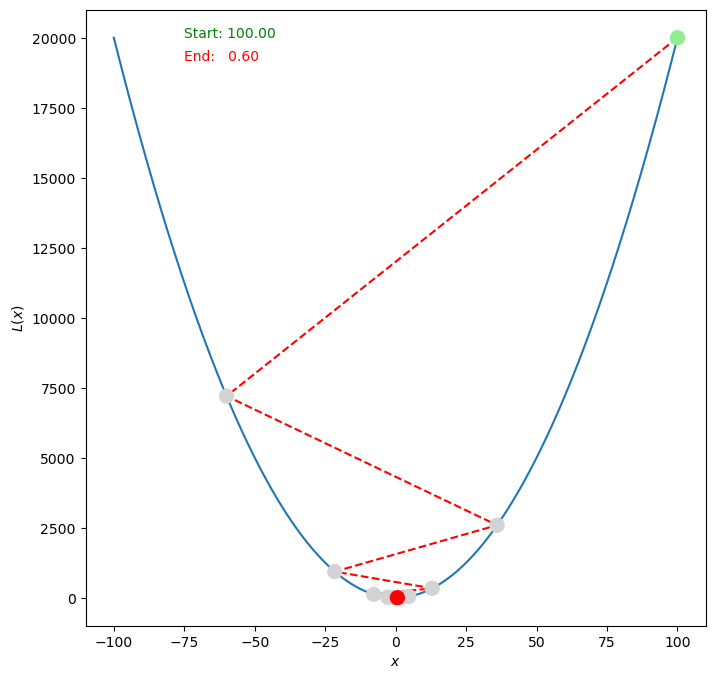

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

x_list = grad_descent([15, 0, 2], step_size=0.4)
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(np.linspace(-100, 100, 1001), 2*(np.linspace(-100, 100, 1001)**2) + 15)
ax.plot(x_list, [2*(x**2) + 15 for x in x_list], c='r', ls='--')
ax.scatter(x_list, [2*(x**2) + 15 for x in x_list], c=colors, s=100, zorder=1000)
ax.text(-75, 20000, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-75, 19200, 'End:   {:.2f}'.format(x_list[-1]), color='red')
ax.set_ylabel(r"$L(x)$")
ax.set_xlabel(r"$x$");


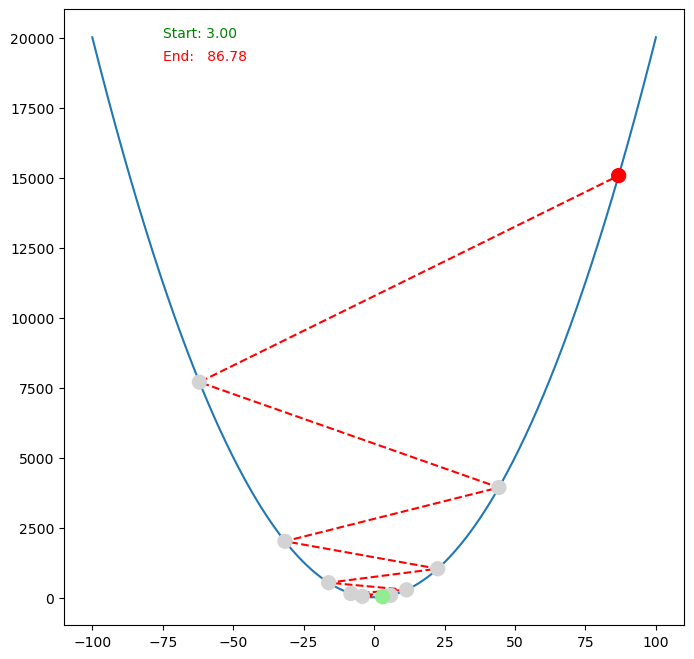

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

x_list = grad_descent([15, 0, 2], step_size=0.6, x=3) 
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(np.linspace(-100, 100, 1001), 2*(np.linspace(-100, 100, 1001)**2) + 15)
ax.plot(x_list, [2*(x**2) + 15 for x in x_list], c='r', ls='--')
ax.scatter(x_list[::-1], [2*(x**2) + 15 for x in x_list][::-1], c=colors[::-1], s=100, zorder=1000)
ax.text(-75, 20000, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-75, 19200, 'End:   {:.2f}'.format(x_list[-1]), color='red');


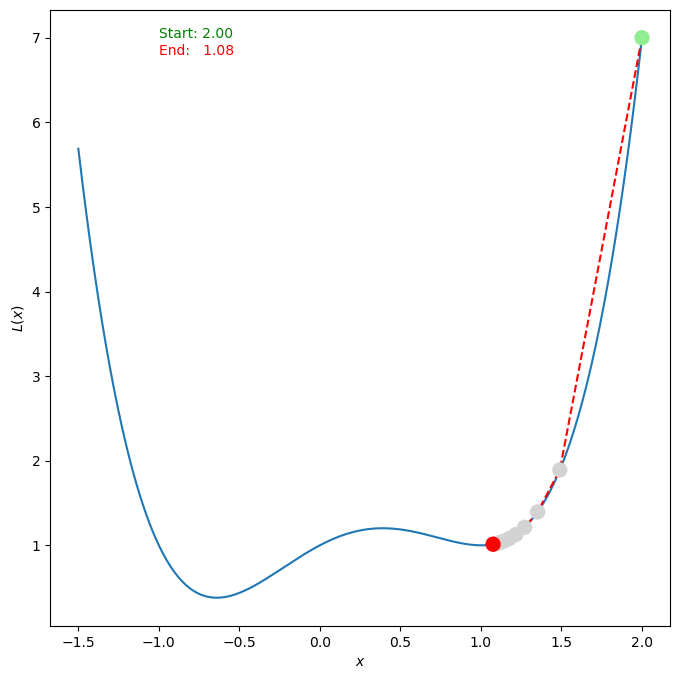

In [8]:
# plot the gradient descent for a non-convex function
fig, ax = plt.subplots(figsize=(8, 8))

x = np.linspace(-1.5, 2, 1001)

def f(x):
    return 1 + x - (x ** 2) - (x ** 3) + (x ** 4)

x_list = grad_descent([1, 1, -1, -1, 1], x=2, step_size=0.03)
colors = ['lightgreen'] + ['lightgray'] * (len(x_list) - 2) + ['r']

ax.plot(x, f(x))
ax.plot(x_list, [f(x) for x in x_list], c='r', ls='--')
ax.scatter(x_list, [f(x) for x in x_list], c=colors, s=100, zorder=1000)
ax.text(-1, 7, 'Start: {:.2f}'.format(x_list[0]), color='green')
ax.text(-1, 6.8, 'End:   {:.2f}'.format(x_list[-1]), color='red')
ax.set_ylabel(r"$L(x)$")
ax.set_xlabel(r"$x$");


In [9]:
data = {
    'Box Office Sales': [85.1, 106.3, 50.2, 130.6, 54.8, 30.3, 79.4, 91.0, 135.4, 89.3],
    'Production Costs': [8.5, 12.9, 5.2, 10.7, 3.1, 3.5, 9.2, 9.0, 15.1, 10.2],
    'Promotion Costs': [5.1, 5.8, 2.1, 8.4, 2.9, 1.2, 3.7, 7.6, 7.7, 4.5],
    'Book Sales': [4.7, 8.8, 15.1, 12.2, 10.6, 3.5, 9.7, 5.9, 20.8, 7.9]
}


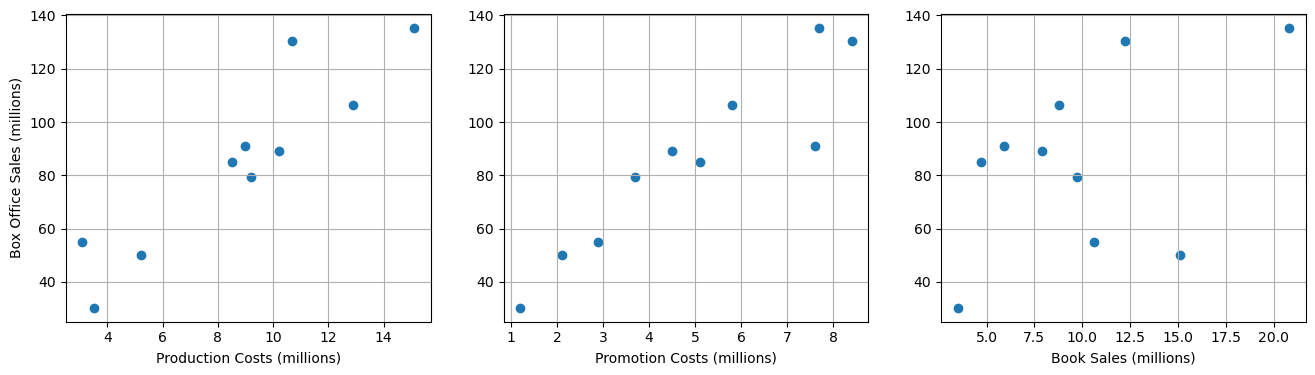

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for var, ax in zip(['Production Costs', 'Promotion Costs', 'Book Sales'], axes):
    ax.scatter(data[var], data['Box Office Sales'])
    ax.set_xlabel(var + ' (millions)')
    ax.grid(True)
    if var == 'Production Costs':
        ax.set_ylabel('Box Office Sales (millions)')


In [11]:
def loss_and_gradient(X, A, y):
    N = X.shape[0]
    yp = X.dot(A)
    loss = np.sum((y - yp) ** 2) / N
    gradient = -2 * X.T.dot(y - yp) / N
    return loss, gradient


In [12]:
data = {
    'Box Office Sales': [85.1, 106.3, 50.2, 130.6, 54.8, 30.3, 79.4, 91.0, 135.4, 89.3],
    'Production Costs': [8.5, 12.9, 5.2, 10.7, 3.1, 3.5, 9.2, 9.0, 15.1, 10.2],
    'Promotion Costs': [5.1, 5.8, 2.1, 8.4, 2.9, 1.2, 3.7, 7.6, 7.7, 4.5],
    'Book Sales': [4.7, 8.8, 15.1, 12.2, 10.6, 3.5, 9.7, 5.9, 20.8, 7.9]
}

# Initialize the four model parameters as random numbers distributed near 0.
N = len(data['Box Office Sales'])
y = np.array(data['Box Office Sales'])
X = np.vstack([np.ones(N), data['Production Costs'], data['Promotion Costs'], data['Book Sales']]).T
A = np.random.normal(size=(4,)) # the four model parameters

# store the loss values recorded during training
losses = []


In [13]:
step_size = 0.001
iterations = 400
losses = list()

for _ in range(iterations):
    loss, grad = loss_and_gradient(X, A, y)
    A -= step_size * grad
    losses.append(loss)


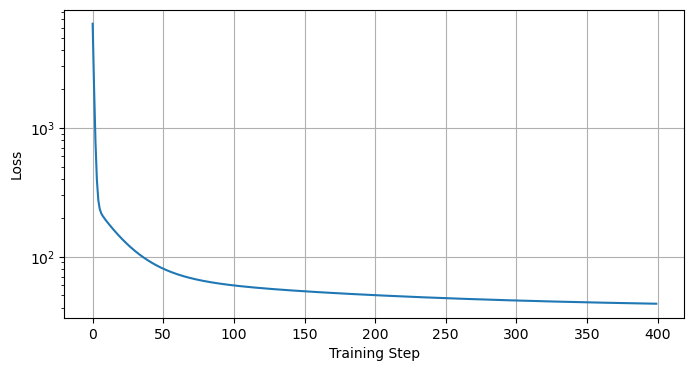

In [14]:
# plot the loss as it changed during training
# note that the y-axis is plotted on a log-scale
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(losses)
ax.set_yscale('log')
ax.set_ylabel("Loss")
ax.set_xlabel("Training Step");
ax.grid(True)


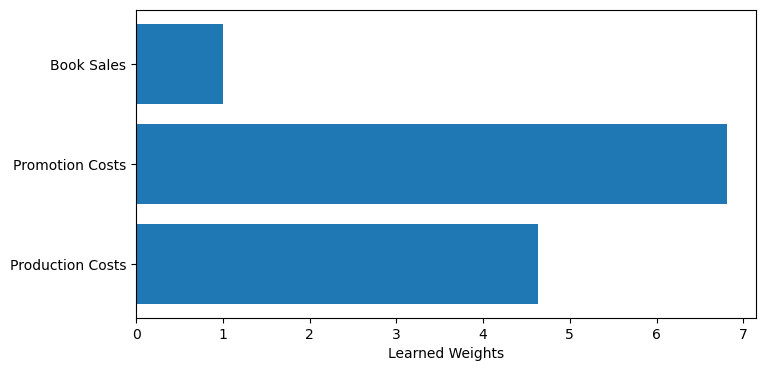

In [15]:
# visualize what weighting your model learned
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(np.arange(3), A[1:])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Production Costs', 'Promotion Costs', 'Book Sales'])
ax.set_xlabel("Learned Weights");


In [16]:
X_prom = X[:, (0, 2)]
A_prom = np.random.normal(size=(2,))

step_size = 0.001
iterations = 400

# perform the same training as before, but
# use `X_prom` and `A_prom` as the data and model weights
step_size = 0.001
iterations = 400

for _ in range(iterations):
    loss, grad = loss_and_gradient(X_prom, A_prom, y)
    A_prom -= step_size * grad


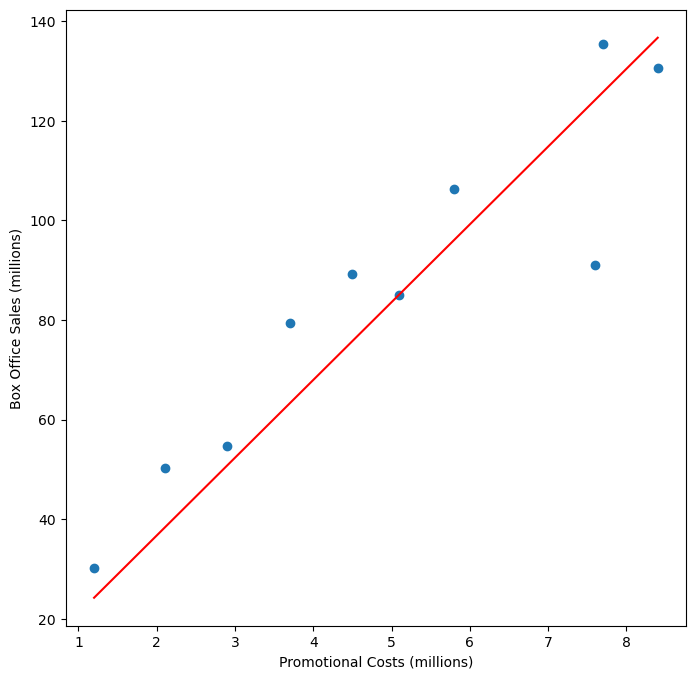

In [17]:
# visualize the linear model that was
# learned to map promotional costs to predicted box office sales
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data['Promotion Costs'], data['Box Office Sales'])
x_dat = np.array([min(data['Promotion Costs']), max(data['Promotion Costs'])])
y_dat = [A_prom[0] + A_prom[1] * x for x in x_dat]
ax.plot(x_dat, y_dat, c='r')
ax.set_xlabel("Promotional Costs (millions)")
ax.set_ylabel("Box Office Sales (millions)")
pass
